Dataset background: The dataset contains employee's positions, levels and salaries.

Goal: Select the best random forest regression model to predict salary amount at a specific level

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [5]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Create RandomForestRegressor regressor

# The number of trees in the forest = 10

In [4]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [6]:
y_pred = regressor.predict(6.5)
y_pred

array([ 167000.])

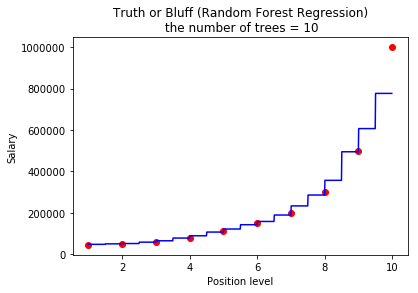

In [12]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)\n the number of trees = 10')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# The number of trees in the forest = 100

In [8]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X, y)
y_pred = regressor.predict(6.5)
y_pred

array([ 158300.])

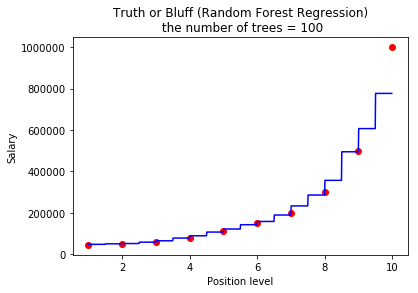

In [11]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)\n the number of trees = 100')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# The number of trees in the forest = 300

In [14]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0) 
regressor.fit(X, y)
y_pred = regressor.predict(6.5)
y_pred

array([ 160333.33333333])

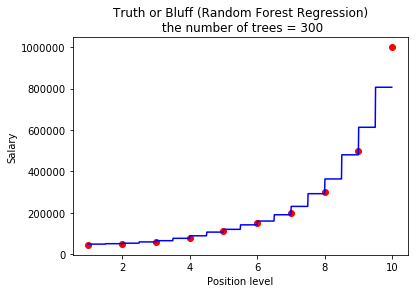

In [15]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)\n the number of trees = 300')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Observations

I get a lot more steps and the splits of interval compared to model with one decision tree. The more trees I add, the more the predicted value will converge to the ultimate average and the more the tree will converge to a certain shape of stairs. However, the number of stairs is not multiplied by the ratio between the number of trees. Among the above 3 cases, the model with 300 trees in the forest makes the most accurate prediction. The last model will be the best one to select.